# <center>COMPANY BANKRUPCY PREDICTION

### CONTEXT

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

Importing the needfull libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm  import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv("./data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [4]:
df.isnull().mean()*100

Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
                                                           ... 
 Liability to Equity                                        0.0
 Degree of Financial Leverage (DFL)                         0.0
 Interest Coverage Ratio (Interest expense to EBIT)         0.0
 Net Income Flag                                            0.0
 Equity to Liability                                        0.0
Length: 96, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### <CENTER>DATA VISUALIZATION

Getting the six most positive and negative correlations with the variable `Bankrupt?

In [6]:
numeric_features = df.select_dtypes(include=["float64"]).columns
categorical_features = df.select_dtypes(include=["int64"]).columns

positive_corr = (
    df[numeric_features]
    .corrwith(df["Bankrupt?"])
    .sort_values(ascending=False)[:6]
    .index.tolist()
)
negative_corr = (
    df[numeric_features].corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()
)

<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

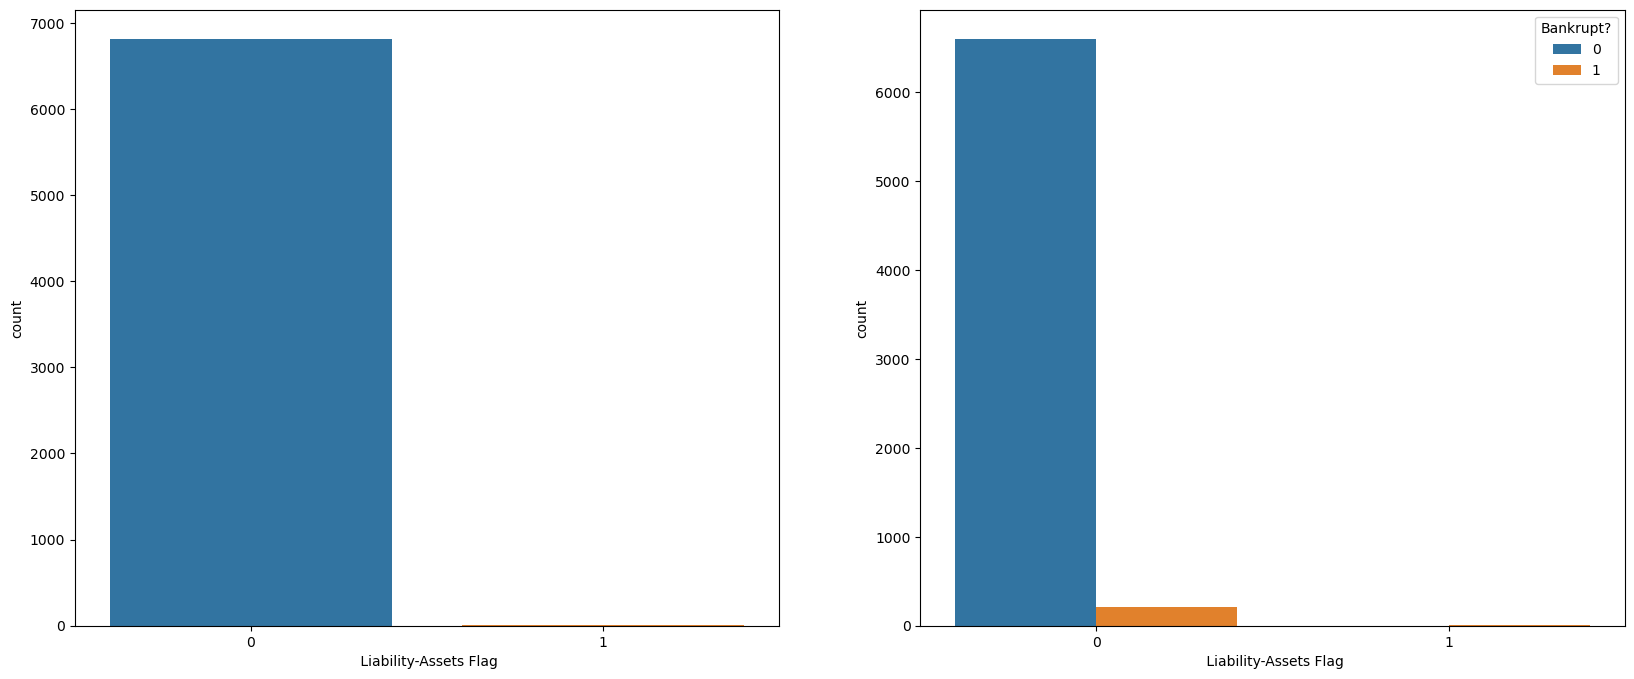

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x=categorical_features[1], ax=ax[0])
sns.countplot(data=df, x=categorical_features[1], hue="Bankrupt?", ax=ax[1])


Only a small fraction of companies go bankrupt, even if they have more assets than liabilities.
In comparison, more companies go bankrupt with fewer assets than liabilities

<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

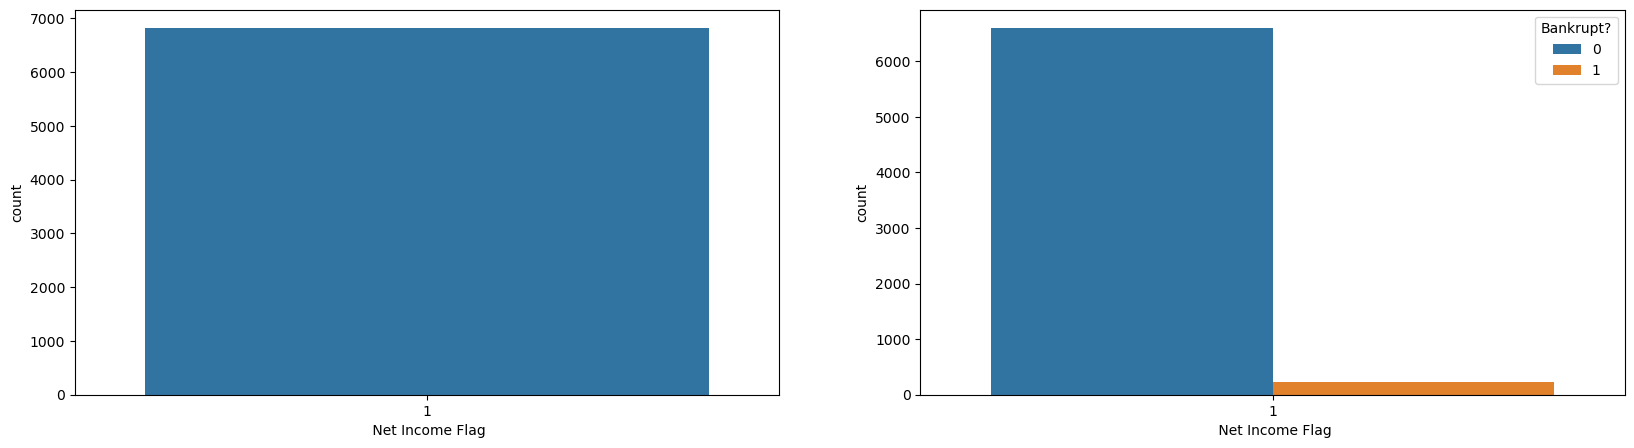

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=df, x=categorical_features[2], ax=ax[0])
sns.countplot(data=df, x=categorical_features[2], hue="Bankrupt?", ax=ax[1])

A small number of companies have been bankrupt with negative net income for two years

#### Data visualization - Correlations

Text(0.5, 0.98, 'Positive correlations')

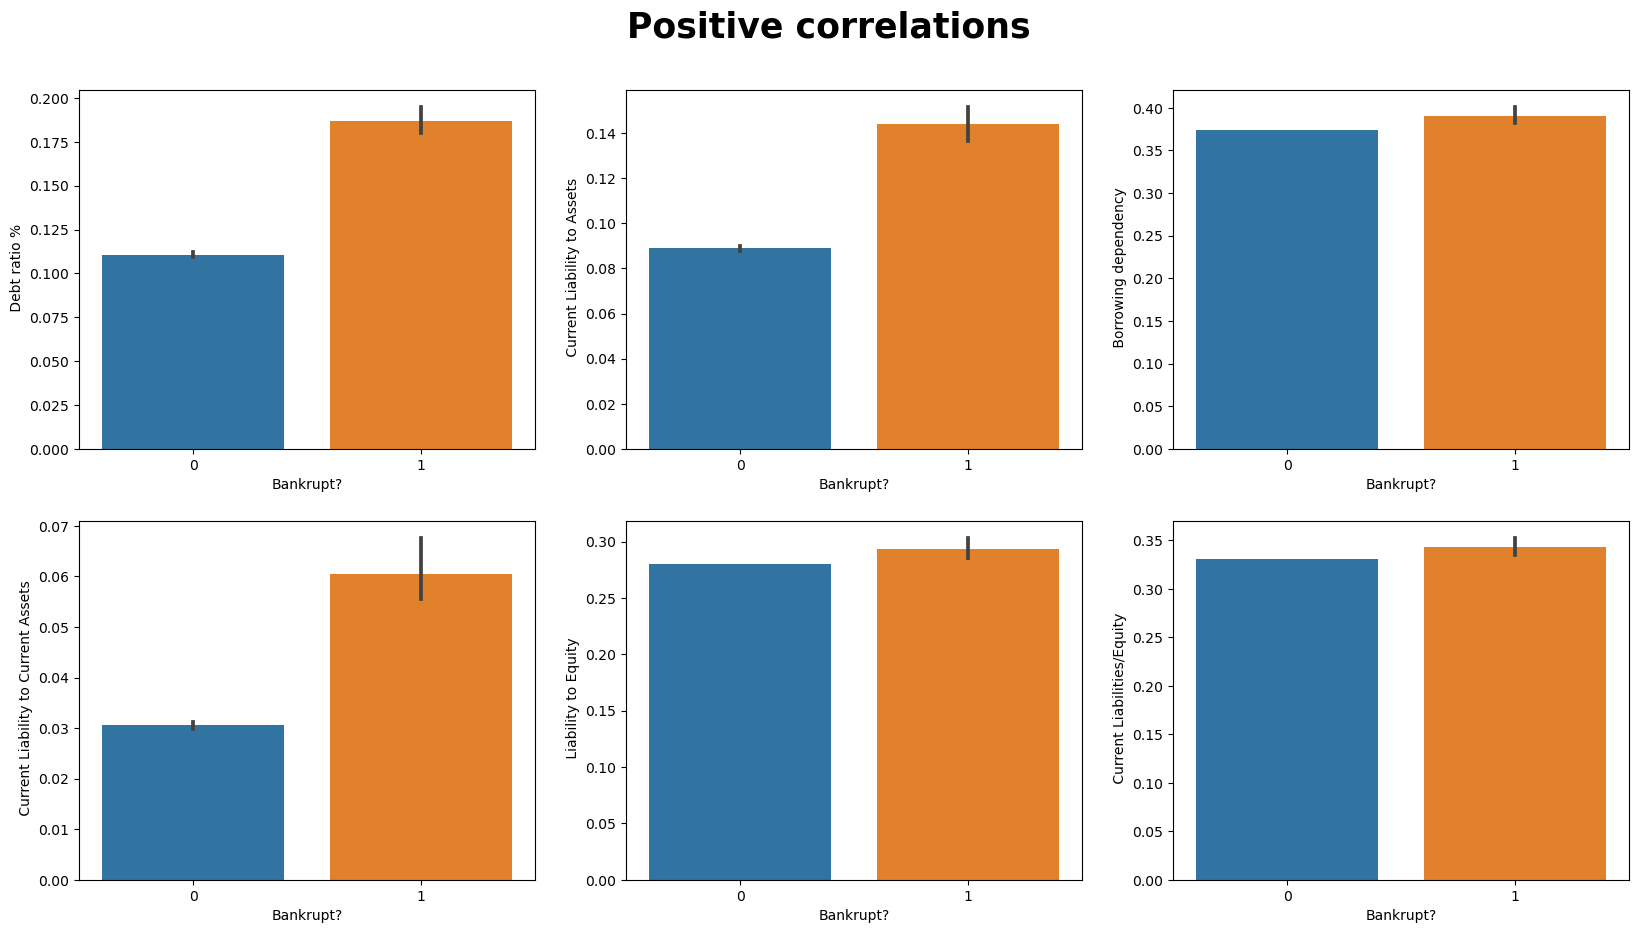

In [9]:
col = 0
row = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for column in positive_corr:
    sns.barplot(data=df, y=column, x="Bankrupt?", ax=ax[row, col])

    col += 1
    if col > 2:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Positive correlations", fontweight="bold", fontsize=25)

We can see that for bankrupt companies Debt %, Current Liabilities to Assets and Current Liabilities to Current Assets have high values

Text(0.5, 0.98, 'Negative correlations')

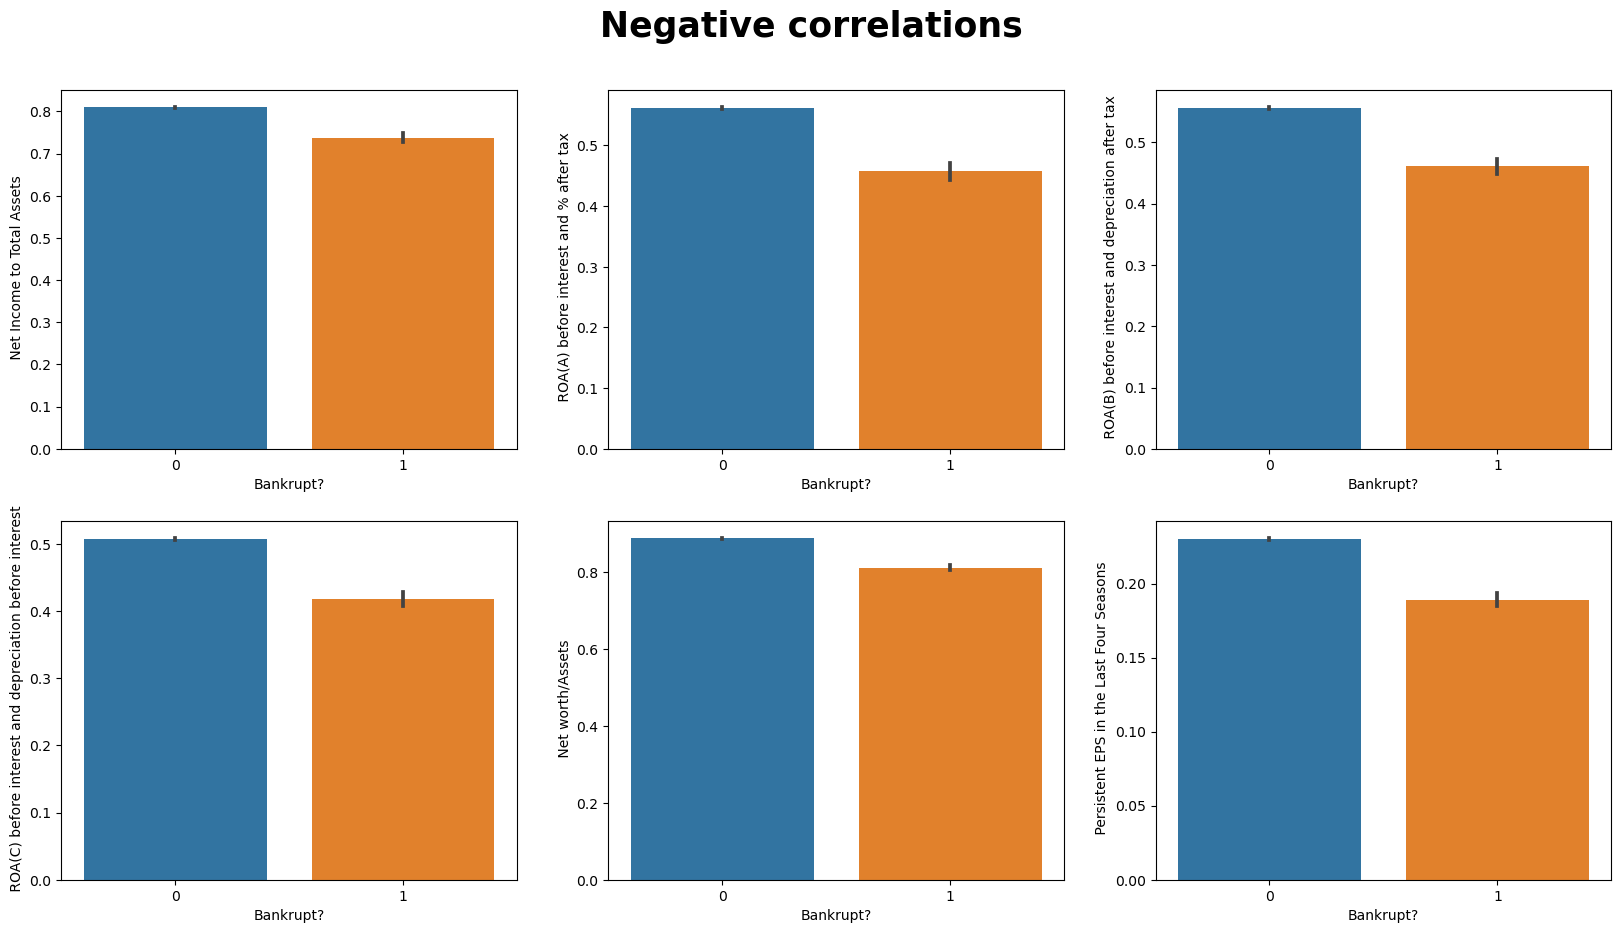

In [10]:
col = 0
row = 0

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for column in negative_corr:
    sns.barplot(data=df, y=column, x="Bankrupt?", ax=ax[row, col])

    col += 1
    if col > 2:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Negative correlations", fontweight="bold", fontsize=25)

The higher the assets and profits, the less likely the company is to go bankrupt

Checking the correlation between the columns using a heatmap

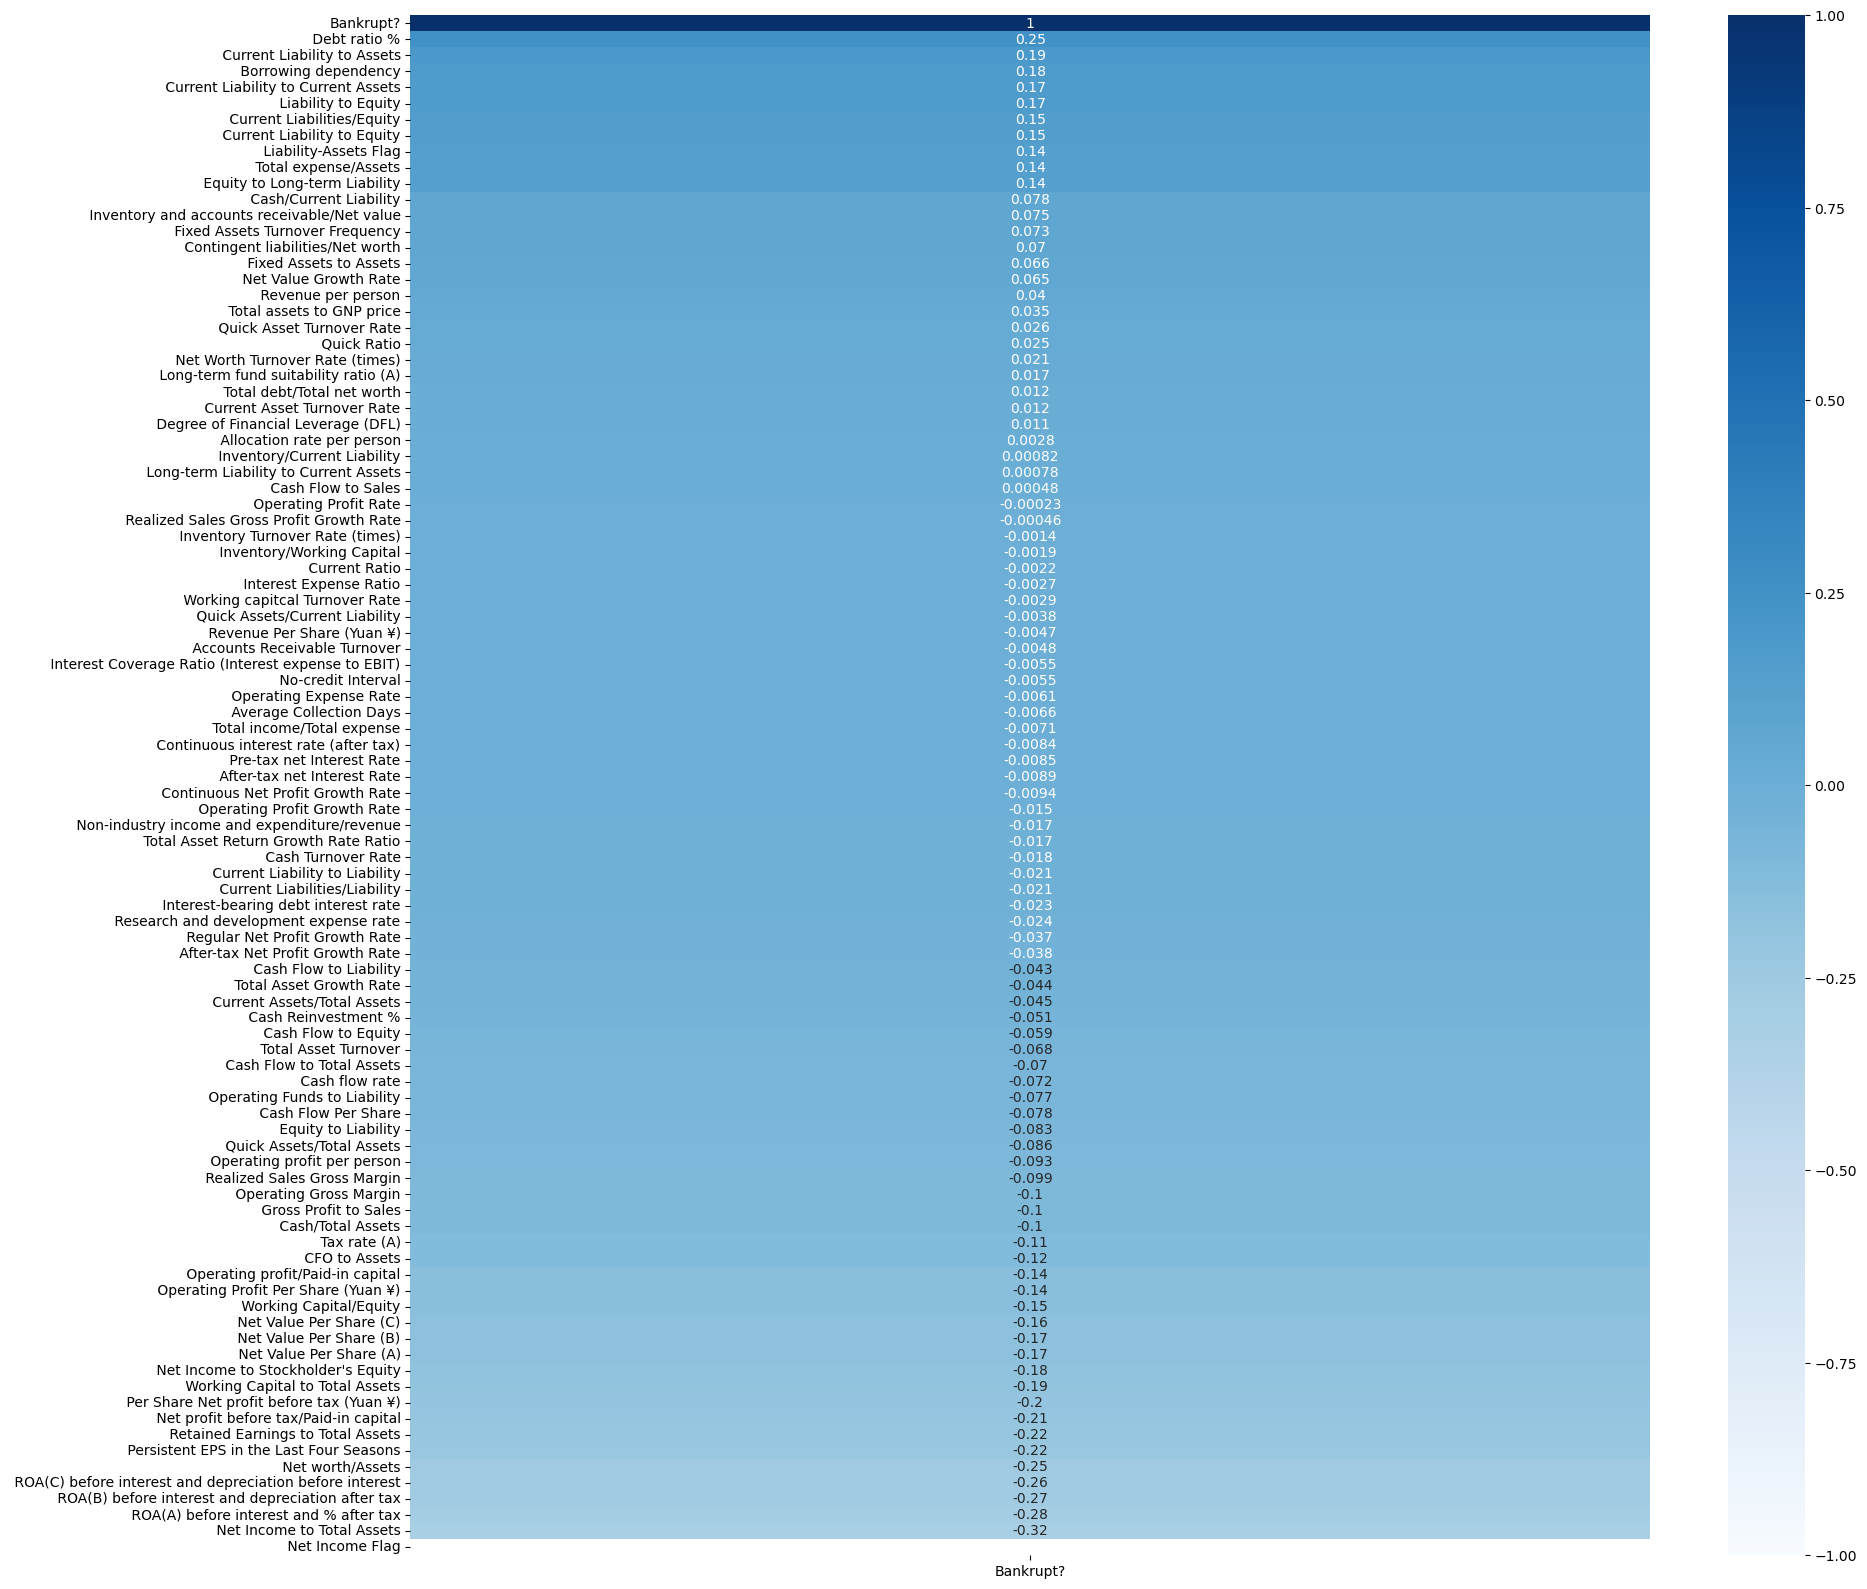

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()[["Bankrupt?"]].sort_values(by="Bankrupt?", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");


In [12]:
x = df.drop(["Bankrupt?", " Net Income Flag"], axis=1)
y = df["Bankrupt?"]

In [13]:
sc=StandardScaler()

In [14]:
x= sc.fit_transform(x)

In [15]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Ridge":RidgeClassifier(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "XGBClassifier":XGBClassifier(),
}

In [16]:
for name, model in models.items():
    scores = cross_val_score(model, x,y,cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.9640725860279649
****************************************************************************************************
cross validation model : Ridge
Mean Score:  0.965977452512908
****************************************************************************************************
cross validation model : SVC
Mean Score:  0.9680304537487997
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.9521942459984238
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.9627525073098472
****************************************************************************************************
cross validation model : AdaBoostClassifier
Mean Score:  0.9631928206320703
********************************************************

In [17]:
model=SVC(kernel='linear', probability=True)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [20]:
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with SVC(kernel='linear', probability=True)
Model accuracy on train is::  0.9715857011915674
Model accuracy on test is::  0.967008797653959
confusion_matrix train is::  [[5281    0]
 [ 155   19]]
confusion_matrix test is::  [[1315    3]
 [  42    4]]
Wrong Predictions made: 45 / 1364
************************************************************


In [21]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT

,ACTUAL,PREDICTION
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6814,0,0
6815,0,0
6816,0,0
6817,0,0


In [22]:
# Accuracy Score
score = round(accuracy_score(y_test,model.predict(x_test)),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 96.7%


model used is :: SVC(kernel='linear', probability=True)


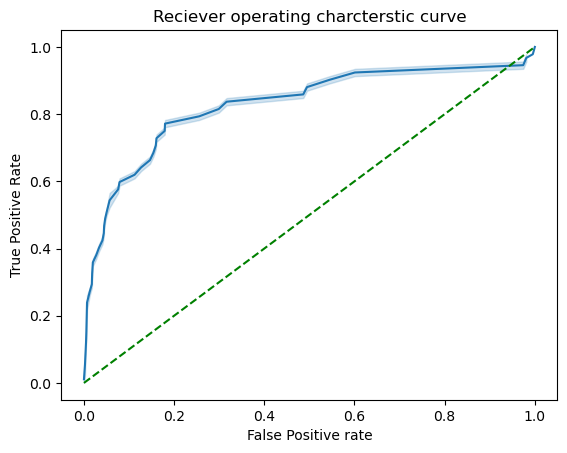

In [23]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,thresold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("model used is ::",model)
sns.lineplot(x=fpr,y=tpr)
plt.plot([0,1],[0,1],color="green",linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever operating charcterstic curve')
plt.show()